In [1]:
import scipy.io as sio
from scipy.io import readsav
import numpy as np
import pandas as pd

This convert the .sav files into .txt files

In [2]:
# import os
# from scipy.io import readsav
# sav_directory = './sav_files'
# txt_directory = './txt_files'
# if not os.path.exists(txt_directory):
#     os.makedirs(txt_directory)
# for filename in os.listdir(sav_directory):
#     if filename.endswith(".sav"):
#         sav_path = os.path.join(sav_directory, filename)
#         data = readsav(sav_path)
#         data_str = str(data)
#         txt_path = os.path.join(txt_directory, filename.replace('.sav', '.txt'))
#         with open(txt_path, 'w') as txt_file:
#             txt_file.write(data_str)
#         print(f'Archivo {txt_path} creado.')

This gives me the name of all the files in the folder sav_files into a list

In [3]:
import os
directory = './sav_files'
sav_files_directory_ls = []
sav_files_ls = [file for file in os.listdir(directory) if file.endswith('.sav')]
for file in sav_files_ls:
    sav_files_directory_ls.append(os.path.join(directory, file))

This gives me the keys of each dictionary saved on each element of the sav_files_directory_ls list

In [4]:
for file in sav_files_directory_ls:
    print(file)
    print(readsav(file).keys())
    print(len(readsav(file).keys()))
    print("#######################")
    "1090904018_950to1050.sav"

./sav_files\1090904016_950to1050.sav
dict_keys(['shot', 'ta', 'tb', 'x', 'x_lim', 'x_sep', 'p_wall', 'mu', 't_i', 't_e', 'n_e', 'vx', 'vx1', 'vx2', 'lc', 'd_pipe', 'gammai', 'xh2', 'nh2', 'gammaxh2', 'th2', 'qxh2_total', 'nhp', 'thp', 'sh', 'sp', 'xh', 'nh', 'gammaxh', 'th', 'qxh_total', 'nethsource', 'sion', 'qh_total', 'sidewallh', 'lyman', 'balmer', 'gammahlim', 'pih_xx', 'pih_yy', 'pih_zz', 'rxhcx', 'rxh2_h', 'rxp_h', 'rxw_h', 'ehcx', 'eh2_h', 'ep_h', 'ew_h', 'epara_perph_h', 'sourceh', 'srecomb', 'l_ne', 'l_te', 'l_nh', 'd_eff', 'sep_rmid'])
57
#######################
./sav_files\1090904016_950to1050_towall.sav
dict_keys(['shot', 'ta', 'tb', 'x', 'x_lim', 'x_sep', 'p_wall', 'mu', 't_i', 't_e', 'n_e', 'vx', 'vx1', 'vx2', 'lc', 'd_pipe', 'gammai', 'xh2', 'nh2', 'gammaxh2', 'th2', 'qxh2_total', 'nhp', 'thp', 'sh', 'sp', 'xh', 'nh', 'gammaxh', 'th', 'qxh_total', 'nethsource', 'sion', 'qh_total', 'sidewallh', 'lyman', 'balmer', 'gammahlim', 'pih_xx', 'pih_yy', 'pih_zz', 'rxhcx', 'rxh2_

# Leyendo txt_file

In [9]:
import glob

def read_txt_to_dict(filename):
    data = {}
    with open(filename, 'r') as file:
        for line in file:
            if ':' in line:
                key, value = line.split(':', 1)
                key = key.strip()
                value = value.strip()
                # Convert the value to a list of floats or a single float
                if '[' in value:
                    value_list = [float(i) for i in value.strip('[]').split()]
                else:
                    value_list = float(value)
                data[key] = value_list
    return data

# Buscar todos los archivos que coincidan con el patrón 'txt_file_nvh_*'
pattern = 'txt_file_nvh_*'
file_list = glob.glob(pattern)

# Leer cada archivo y guardar los resultados en un diccionario
all_data = {}
for filename in file_list:
    all_data[filename] = read_txt_to_dict(filename)

# Imprimir el tiempo de ejecución de cada archivo
for filename, data in all_data.items():
    print(f"{filename}: {data['tiempo_ejecución']}")


txt_file_nvh_10_nvh2_10.txt: 217.7946581840515
txt_file_nvh_10_nvh2_15.txt: 271.6335771083832
txt_file_nvh_10_nvh2_20.txt: 341.80497002601624
txt_file_nvh_10_nvh2_25.txt: 44.81447172164917
txt_file_nvh_10_nvh2_30.txt: 41.72659969329834
txt_file_nvh_10_nvh2_35.txt: 46.16170883178711
txt_file_nvh_10_nvh2_40.txt: 76.70253682136536
txt_file_nvh_10_nvh2_45.txt: 104.29664397239685
txt_file_nvh_10_nvh2_50.txt: 141.44453883171082
txt_file_nvh_15_nvh2_10.txt: 178.16683149337769
txt_file_nvh_15_nvh2_15.txt: 272.21916222572327
txt_file_nvh_15_nvh2_20.txt: 339.2017648220062
txt_file_nvh_15_nvh2_25.txt: 44.51017427444458
txt_file_nvh_15_nvh2_30.txt: 41.71741580963135
txt_file_nvh_15_nvh2_35.txt: 45.347545862197876
txt_file_nvh_15_nvh2_40.txt: 73.19319128990173
txt_file_nvh_15_nvh2_45.txt: 99.55699968338013
txt_file_nvh_15_nvh2_50.txt: 129.76896452903748
txt_file_nvh_20_nvh2_10.txt: 183.21778917312622
txt_file_nvh_20_nvh2_15.txt: 270.97113847732544
txt_file_nvh_20_nvh2_20.txt: 340.47900319099426
txt

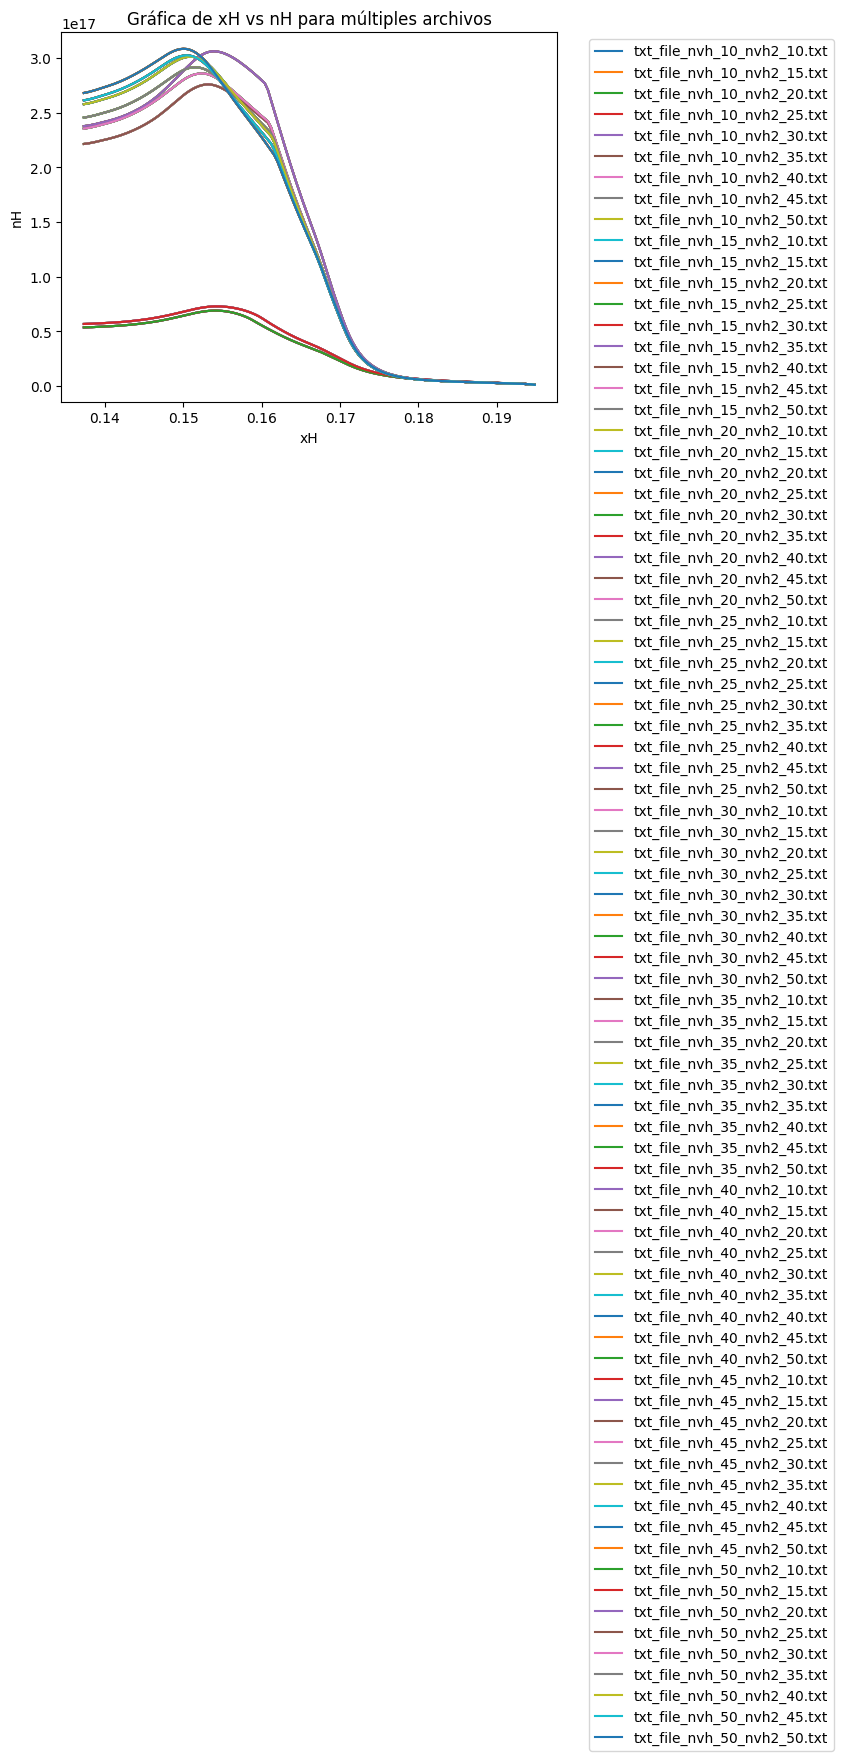

In [3]:
import glob
import re
import matplotlib.pyplot as plt

def read_variable_from_txt(filename, variable_name):
    with open(filename, 'r') as file:
        content = file.read()
    
    # Usar expresión regular para encontrar y extraer los valores de la variable
    pattern = rf"{variable_name}:\s*\[([^\]]+)\]"
    match = re.search(pattern, content)
    if match:
        values_str = match.group(1)
        values_list = [float(val) for val in values_str.split()]
        return values_list
    else:
        return None

# Buscar todos los archivos que coincidan con el patrón 'txt_file_nvh_*'
pattern = 'txt_file_nvh_*'
file_list = glob.glob(pattern)

# Leer los valores de xH y nH de cada archivo y graficarlos
for filename in file_list:
    xH = read_variable_from_txt(filename, 'xH')
    nH = read_variable_from_txt(filename, 'nH')
    
    if xH is not None and nH is not None:
        plt.plot(xH, nH, label=filename)

# Configurar la gráfica
plt.xlabel('xH')
plt.ylabel('nH')
plt.title('Gráfica de xH vs nH para múltiples archivos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.show()
